# k-mean Clustering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
dataset=pd.read_csv("Customers.csv")

In [7]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
x=dataset.iloc[:,[3,4]].values

In [22]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [23]:
## using the Elbow method to finds the optimal number of clusters
from sklearn.cluster import KMeans

C:\Users\salma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


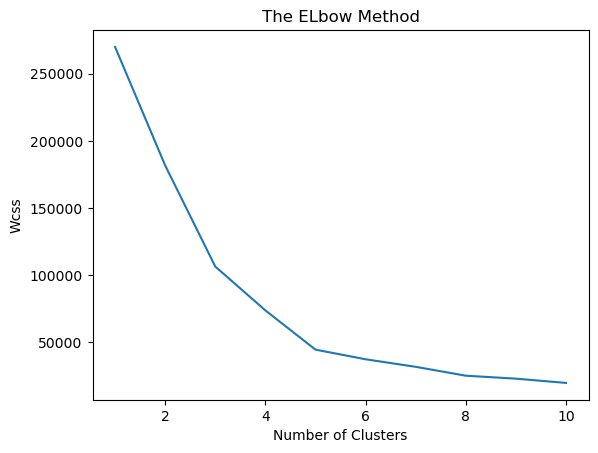

In [25]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans( n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The ELbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()
        
        
    
    

In [29]:
 kmeans=KMeans( n_clusters=5,init='k-means++')
 y_kmeans=kmeans.fit_predict(x)
    

In [28]:
y_kmeans

array([9, 4, 5, 4, 9, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 9, 4, 9, 4, 9, 4,
       5, 4, 5, 4, 9, 0, 9, 4, 5, 4, 5, 4, 5, 4, 5, 4, 9, 4, 9, 4, 9, 0,
       9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 8, 1, 3, 6, 8, 1, 8, 1,
       3, 1, 8, 6, 8, 1, 8, 1, 8, 6, 3, 6, 8, 6, 3, 1, 8, 6, 8, 6, 8, 1,
       8, 6, 8, 1, 8, 1, 8, 6, 8, 6, 8, 1, 8, 6, 8, 1, 8, 1, 8, 6, 8, 6,
       8, 1, 8, 6, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7])

In [30]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

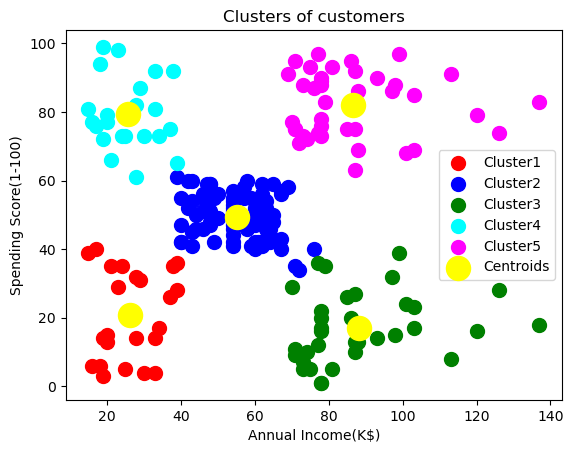

In [32]:
#Visualize the clusters

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import silhouette_samples,silhouette_score
lst_sl_avg=[]
for i in range(2,10):
    cluster_model=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=cluster_model.fit_predict(x)
    sil_avg=silhouette_score(x,cluster_labels)
    lst_sl_avg.append(sil_avg)

In [35]:
lst_sl_avg

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5264283703685728,
 0.4545575646149356,
 0.4592339450478494]